In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import calendar
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df= pd.read_csv('weather_week_hourly_data.csv')

FileNotFoundError: File b'weather_week_hourly_data.csv' does not exist

In [ ]:
df['city'].unique()

In [5]:
df.head()

,year,month,day,time_bin,city,time_pdt,temp_F,humidity_perc,Visibility_mi,wind_dir,wind_mph,precipitation_in,events,conditions
0,2018,4,10,4/10/18,sf,12:56 AM,64.0,43%,10.0,W,15,NaN,NaN,Overcast
1,2018,4,10,4/10/18,sf,1:56 AM,60.1,55%,10.0,W,18.4,NaN,NaN,Mostly Cloudy
2,2018,4,10,4/10/18,sf,2:56 AM,57.9,72%,10.0,NW,4.6,NaN,NaN,Mostly Cloudy
3,2018,4,10,4/10/18,sf,3:56 AM,59.0,67%,10.0,N,3.5,NaN,NaN,Mostly Cloudy
4,2018,4,10,4/10/18,sf,4:56 AM,57.9,72%,10.0,NNW,4.6,NaN,NaN,Mostly Cloudy


In [6]:
sf = df[df['city'] == 'sf']
dc = df[df['city'] == 'dc']
chi = df[df['city'] == 'chi']
nyc = df[df['city'] == 'nyc']
atl = df[df['city'] == 'atl']
vegas = df[df['city'] == 'vegas']
cities = [sf,chi,dc,nyc,atl,vegas]

In [7]:
for city in cities:
    city.reset_index(drop=True)

In [8]:
sf_mean = sf.groupby('day').mean().reset_index()
dc_mean = dc.groupby('day').mean().reset_index()
chi_mean = chi.groupby('day').mean().reset_index()
nyc_mean = nyc.groupby('day').mean().reset_index()
atl_mean = atl.groupby('day').mean().reset_index()
vegas_mean = vegas.groupby('day').mean().reset_index()

In [9]:
sf_sum = sf.groupby('day').sum().reset_index()
dc_sum = dc.groupby('day').sum().reset_index()
chi_sum = chi.groupby('day').sum().reset_index()
nyc_sum = nyc.groupby('day').sum().reset_index()
atl_sum = atl.groupby('day').sum().reset_index()
vegas_sum = vegas.groupby('day').sum().reset_index()

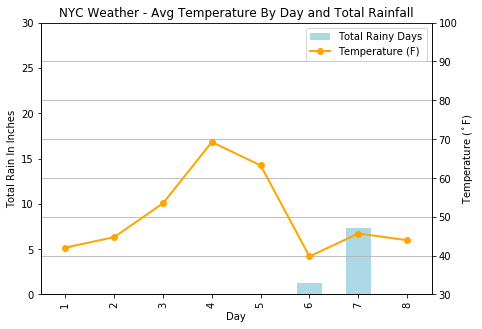

In [10]:
# NYC
nyc1 = nyc_mean[['day','temp_F']].rename(columns={'temp_F':'Average_Temp'})
nyc2 = nyc_sum[['day','precipitation_in']].rename(columns={'precipitation_in':'Total_Rainfall'})
nyc_final = nyc1.merge(nyc2, on='day',how='left').rename(columns={'day':'Date_Num'})

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)

ax1=nyc_final['Total_Rainfall'].plot(kind='bar', label="Total Rainy Days",color="lightblue")
ax2=ax1.twinx()

ax2.plot(nyc_final[['Average_Temp']].values, label="Temperature (F)", linestyle='-',color="orange", marker='o', linewidth=2)
ax2.set_ylim((30, 100.))
ax1.set_ylim((0, 30.))

#Set Axis label
ax1.set_xlabel('Day')
ax1.set_ylabel('Total Rain In Inches', color='black')
ax2.set_ylabel('Temperature ($^\circ$F)', color='black')
plt.xticks(np.arange(len(nyc_final)), [x for x in range(1,9)])
#set legend
fig.legend(loc=1,bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

# # Create a legend for our chart
plt.title("NYC Weather - Avg Temperature By Day and Total Rainfall")
plt.grid()

# plt.ylabel("Bars Per 10,000 Households")
plt.savefig('nyc.png')
plt.show()

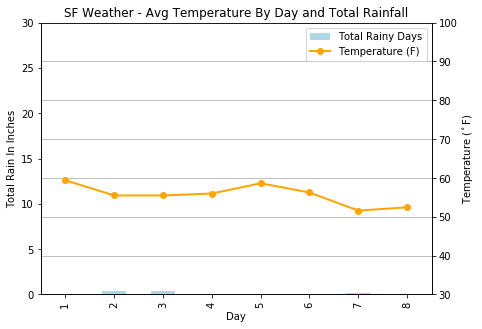

In [11]:
# SF
sf1 = sf_mean[['day','temp_F']].rename(columns={'temp_F':'Average_Temp'})
sf2 = sf_sum[['day','precipitation_in']].rename(columns={'precipitation_in':'Total_Rainfall'})
sf_final = sf1.merge(sf2, on='day',how='left').rename(columns={'day':'Date_Num'})

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)

ax1=sf_final['Total_Rainfall'].plot(kind='bar', label="Total Rainy Days",color="lightblue")
ax2=ax1.twinx()

ax2.plot(sf_final[['Average_Temp']].values, label="Temperature (F)", linestyle='-',color="orange", marker='o', linewidth=2)
ax2.set_ylim((30, 100.))
ax1.set_ylim((0, 30.))

#Set Axis label
ax1.set_xlabel('Day')
ax1.set_ylabel('Total Rain In Inches', color='black')
ax2.set_ylabel('Temperature ($^\circ$F)', color='black')
plt.xticks(np.arange(len(sf_final)), [x for x in range(1,9)])
#set legend
fig.legend(loc=1,bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

# # Create a legend for our chart
plt.title("SF Weather - Avg Temperature By Day and Total Rainfall")
plt.grid()

# plt.ylabel("Bars Per 10,000 Households")
plt.savefig('sf.png')
plt.show()

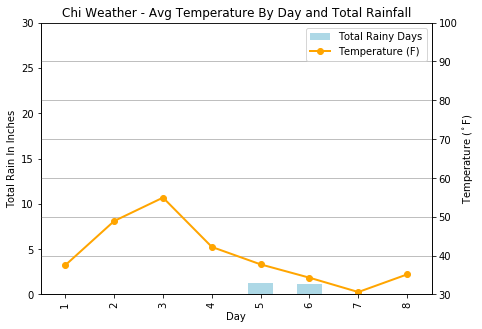

In [12]:
# CHI
chi1 = chi_mean[['day','temp_F']].rename(columns={'temp_F':'Average_Temp'})
chi2 = chi_sum[['day','precipitation_in']].rename(columns={'precipitation_in':'Total_Rainfall'})
chi_final = chi1.merge(chi2, on='day',how='left').rename(columns={'day':'Date_Num'})

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)

ax1=chi_final['Total_Rainfall'].plot(kind='bar', label="Total Rainy Days",color="lightblue")
ax2=ax1.twinx()

ax2.plot(chi_final[['Average_Temp']].values, label="Temperature (F)", linestyle='-',color="orange", marker='o', linewidth=2)
ax2.set_ylim((30, 100.))
ax1.set_ylim((0, 30.))

#Set Axis label
ax1.set_xlabel('Day')
ax1.set_ylabel('Total Rain In Inches', color='black')
ax2.set_ylabel('Temperature ($^\circ$F)', color='black')
plt.xticks(np.arange(len(chi_final)), [x for x in range(1,9)])
#set legend
fig.legend(loc=1,bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

# # Create a legend for our chart
plt.title("Chi Weather - Avg Temperature By Day and Total Rainfall")
plt.grid()

# plt.ylabel("Bars Per 10,000 Households")
plt.savefig('chi.png')
plt.show()

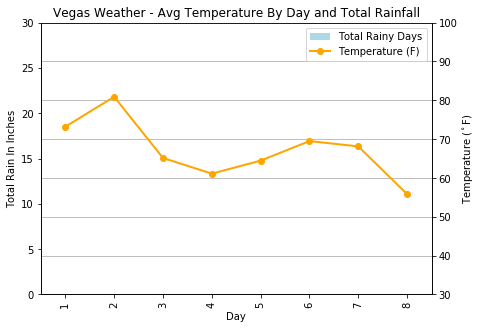

In [13]:
# vegas
vegas1 = vegas_mean[['day','temp_F']].rename(columns={'temp_F':'Average_Temp'})
vegas2 = vegas_sum[['day','precipitation_in']].rename(columns={'precipitation_in':'Total_Rainfall'})
vegas_final = vegas1.merge(vegas2, on='day',how='left').rename(columns={'day':'Date_Num'})

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)

ax1=vegas_final['Total_Rainfall'].plot(kind='bar', label="Total Rainy Days",color="lightblue")
ax2=ax1.twinx()

ax2.plot(vegas_final[['Average_Temp']].values, label="Temperature (F)", linestyle='-',color="orange", marker='o', linewidth=2)
ax2.set_ylim((30, 100.))
ax1.set_ylim((0, 30.))

#Set Axis label
ax1.set_xlabel('Day')
ax1.set_ylabel('Total Rain In Inches', color='black')
ax2.set_ylabel('Temperature ($^\circ$F)', color='black')
plt.xticks(np.arange(len(vegas_final)), [x for x in range(1,9)])
#set legend
fig.legend(loc=1,bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

# # Create a legend for our chart
plt.title("Vegas Weather - Avg Temperature By Day and Total Rainfall")
plt.grid()

# plt.ylabel("Bars Per 10,000 Households")
plt.savefig('vegas.png')
plt.show()

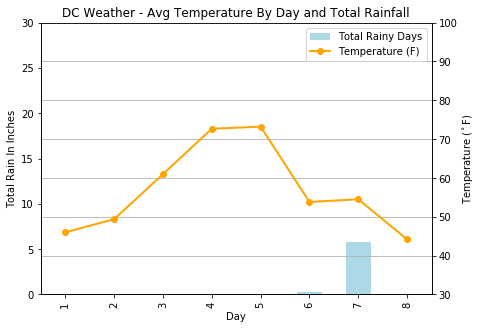

In [14]:
# DC
dc1 = dc_mean[['day','temp_F']].rename(columns={'temp_F':'Average_Temp'})
dc2 = dc_sum[['day','precipitation_in']].rename(columns={'precipitation_in':'Total_Rainfall'})
dc_final = dc1.merge(dc2, on='day',how='left').rename(columns={'day':'Date_Num'}).rename(columns={'day':'Date_Num'})

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)

ax1=dc_final['Total_Rainfall'].plot(kind='bar', label="Total Rainy Days",color="lightblue")
ax2=ax1.twinx()

ax2.plot(dc_final[['Average_Temp']].values, label="Temperature (F)", linestyle='-',color="orange", marker='o', linewidth=2)
ax2.set_ylim((30, 100.))
ax1.set_ylim((0, 30.))

#Set Axis label
ax1.set_xlabel('Day')
ax1.set_ylabel('Total Rain In Inches', color='black')
ax2.set_ylabel('Temperature ($^\circ$F)', color='black')
plt.xticks(np.arange(len(dc_final)), [x for x in range(1,9)])
#set legend
fig.legend(loc=1,bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

# # Create a legend for our chart
plt.title("DC Weather - Avg Temperature By Day and Total Rainfall")
plt.grid()

# plt.ylabel("Bars Per 10,000 Households")
plt.savefig('dc.png')
plt.show()

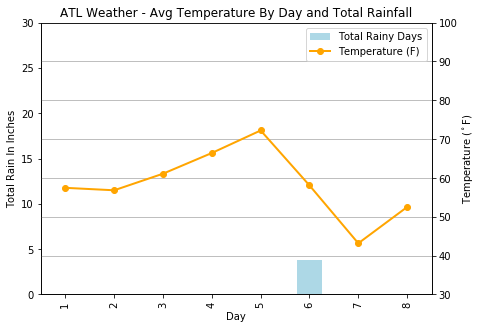

In [15]:
# ATL
atl1 = atl_mean[['day','temp_F']].rename(columns={'temp_F':'Average_Temp'})
atl2 = atl_sum[['day','precipitation_in']].rename(columns={'precipitation_in':'Total_Rainfall'})
atl_final = atl1.merge(atl2, on='day',how='left').rename(columns={'day':'Date_Num'})

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)

ax1=atl_final['Total_Rainfall'].plot(kind='bar', label="Total Rainy Days",color="lightblue")
ax2=ax1.twinx()

ax2.plot(atl_final[['Average_Temp']].values, label="Temperature (F)", linestyle='-',color="orange", marker='o', linewidth=2)
ax2.set_ylim((30, 100.))
ax1.set_ylim((0, 30.))

#Set Axis label
ax1.set_xlabel('Day')
ax1.set_ylabel('Total Rain In Inches', color='black')
ax2.set_ylabel('Temperature ($^\circ$F)', color='black')
plt.xticks(np.arange(len(atl_final)), [x for x in range(1,9)])
#set legend
fig.legend(loc=1,bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

# # Create a legend for our chart
plt.title("ATL Weather - Avg Temperature By Day and Total Rainfall")
plt.grid()

# plt.ylabel("Bars Per 10,000 Households")
plt.savefig('atl.png')
plt.show()

In [16]:
twitter_data = pd.read_csv("twitter.csv")

In [17]:
def days(row):
    return row['Date'][7:10].strip(' ')
    
twitter_data['Date_Num'] = twitter_data.apply(lambda row: days(row), axis=1)

In [18]:
twitter_data

,Unnamed: 0,Compound,Date,Neutral,Negative,Positive,Subject,Tweets Ago,Date_Num
0,0,0.0000,Tue Apr 17 04:05:42 +0000 2018,1.000,0.000,0.000,@SFBART,0,17
1,1,-0.5719,Tue Apr 17 03:55:03 +0000 2018,0.712,0.207,0.081,@SFBART,1,17
2,2,0.1857,Tue Apr 17 03:42:20 +0000 2018,0.882,0.000,0.118,@SFBART,2,17
3,3,0.0000,Tue Apr 17 03:34:28 +0000 2018,1.000,0.000,0.000,@SFBART,3,17
4,4,0.4588,Tue Apr 17 03:29:07 +0000 2018,0.850,0.000,0.150,@SFBART,4,17
5,5,0.0000,Tue Apr 17 03:25:59 +0000 2018,1.000,0.000,0.000,@SFBART,5,17
6,6,0.4404,Tue Apr 17 02:53:34 +0000 2018,0.879,0.000,0.121,@SFBART,6,17
7,7,0.4019,Tue Apr 17 02:52:58 +0000 2018,0.856,0.000,0.144,@SFBART,7,17
8,8,-0.5574,Tue Apr 17 02:45:25 +0000 2018,0.825,0.175,0.000,@SFBART,8,17
9,9,-0.4767,Tue Apr 17 02:37:48 +0000 2018,0.876,0.124,0.000,@SFBART,9,17


In [19]:
twit = twitter_data[['Subject','Date_Num','Compound','Neutral','Negative','Positive']].groupby(['Subject','Date_Num']).mean().reset_index()
twit['Date_Num'] = twit['Date_Num'].astype(int)

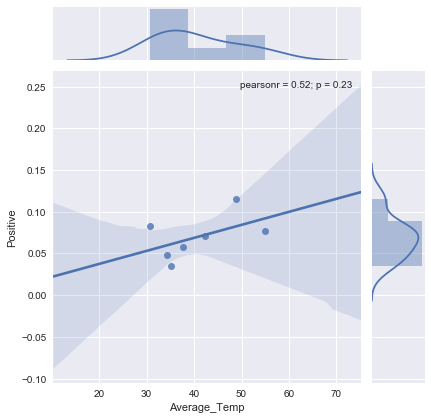

In [60]:
chicago = twit[twit['Subject']=='@CTA'].merge(chi_final, on='Date_Num', how='left')
chicago

import seaborn as sns
sns.set(color_codes=True)
# sns.lmplot(x='temp_avg',y='temp_high',data=df,fit_reg=True) 
sns.jointplot(x="Average_Temp", y="Positive", data=chicago, kind="reg")
plt.savefig('chicago.png')
plt.show();

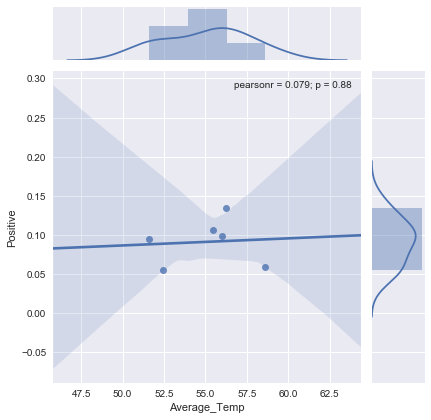

In [61]:
sanfrancisco = twit[twit['Subject']=='@SFBART'].merge(sf_final, on='Date_Num', how='left')
sanfrancisco

import seaborn as sns
sns.set(color_codes=True)
# sns.lmplot(x='temp_avg',y='temp_high',data=df,fit_reg=True) 
sns.jointplot(x="Average_Temp", y="Positive", data=sanfrancisco, kind="reg")
plt.savefig('sanfrancisco.png')
plt.show();

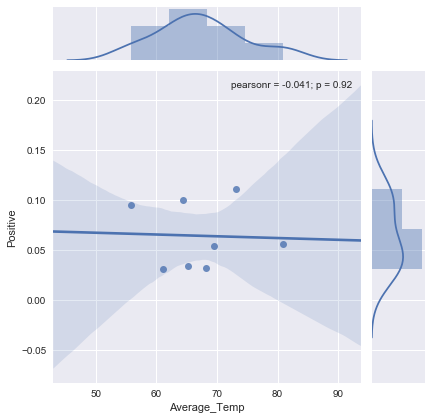

In [62]:
lasvegas = twit[twit['Subject']=='@RTCSNV'].merge(vegas_final, on='Date_Num', how='left')
lasvegas

import seaborn as sns
sns.set(color_codes=True)
# sns.lmplot(x='temp_avg',y='temp_high',data=df,fit_reg=True) 
sns.jointplot(x="Average_Temp", y="Positive", data=lasvegas, kind="reg")
plt.savefig('lasvegas.png')
plt.show();

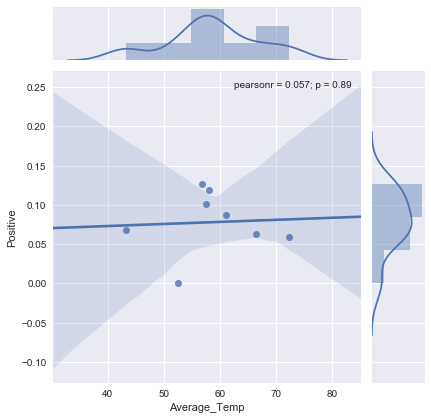

In [63]:
atlanta = atl_final.merge(twit[twit['Subject']=='@MARTASERVICE'], on='Date_Num', how='left')
atlanta

import seaborn as sns
sns.set(color_codes=True)
# sns.lmplot(x='temp_avg',y='temp_high',data=df,fit_reg=True) 
sns.jointplot(x="Average_Temp", y="Positive", data=atlanta, kind="reg")
plt.savefig('atlanta.png')
plt.show();

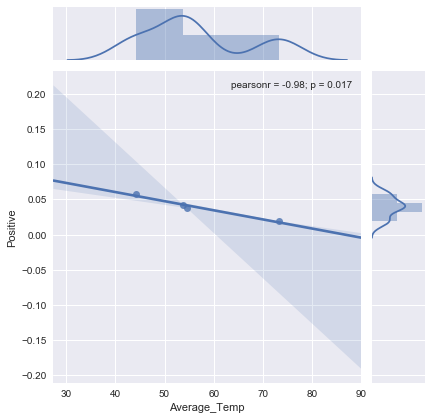

In [64]:
washingtondc = twit[twit['Subject']=='@WMATA'].merge(dc_final, on='Date_Num', how='left')
washingtondc

import seaborn as sns
sns.set(color_codes=True)
# sns.lmplot(x='temp_avg',y='temp_high',data=df,fit_reg=True) 
sns.jointplot(x="Average_Temp", y="Positive", data=washingtondc, kind="reg")
plt.savefig('washingtondc.png')
plt.show();

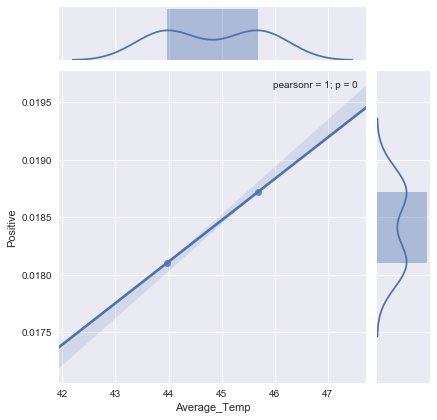

In [66]:
newyork = twit[twit['Subject']=='@nyctsubway'].merge(nyc_final, on='Date_Num', how='left')
newyork

import seaborn as sns
sns.set(color_codes=True)
# sns.lmplot(x='temp_avg',y='temp_high',data=df,fit_reg=True) 
sns.jointplot(x="Average_Temp", y="Positive", data=newyork, kind="reg")
plt.savefig('newyorkc.png')
plt.show();

In [67]:
chicago

,Subject,Date_Num,Compound,Neutral,Negative,Positive,Average_Temp,Total_Rainfall
0,@CTA,11,0.032292,0.797720,0.086480,0.115820,48.908333,0.01
1,@CTA,12,0.015789,0.860865,0.062809,0.076343,54.934615,0.07
2,@CTA,13,-0.003216,0.872479,0.056946,0.070575,42.228571,0.05
3,@CTA,14,0.034740,0.897457,0.044457,0.058129,37.734375,1.23
4,@CTA,15,0.024797,0.909388,0.042388,0.048228,34.306383,1.10
5,@CTA,16,0.096887,0.876665,0.040931,0.082404,30.616129,0.03
6,@CTA,17,-0.041295,0.911116,0.053674,0.035186,35.155556,0.00


In [68]:
sanfrancisco

,Subject,Date_Num,Compound,Neutral,Negative,Positive,Average_Temp,Total_Rainfall
0,@SFBART,12,0.153434,0.853137,0.040954,0.105893,55.487500,0.37
1,@SFBART,13,0.064729,0.835735,0.065748,0.098463,55.987500,NaN
2,@SFBART,14,0.067395,0.908182,0.033164,0.058645,58.629167,NaN
3,@SFBART,15,0.210662,0.820780,0.044680,0.134540,56.257692,0.05
4,@SFBART,16,0.176375,0.877981,0.027642,0.094377,51.584000,0.11
5,@SFBART,17,0.088747,0.922936,0.021426,0.055638,52.438889,NaN


In [69]:
lasvegas

,Subject,Date_Num,Compound,Neutral,Negative,Positive,Average_Temp,Total_Rainfall
0,@RTCSNV,6,-0.037632,0.907735,0.051574,0.040706,NaN,NaN
1,@RTCSNV,7,0.086806,0.851444,0.057944,0.090444,NaN,NaN
2,@RTCSNV,8,0.002568,0.850409,0.073136,0.076455,NaN,NaN
3,@RTCSNV,9,0.100114,0.834214,0.078214,0.087571,NaN,NaN
4,@RTCSNV,10,0.038638,0.799231,0.090462,0.110308,73.200000,NaN
5,@RTCSNV,11,-0.009749,0.884472,0.059679,0.055849,80.903704,NaN
6,@RTCSNV,12,-0.194192,0.864385,0.101962,0.033615,65.136000,NaN
7,@RTCSNV,13,-0.001256,0.926235,0.042441,0.031324,61.104000,NaN
8,@RTCSNV,14,-0.111637,0.766187,0.133563,0.100250,64.462500,NaN
9,@RTCSNV,15,-0.071771,0.857238,0.088619,0.054095,69.491667,NaN


In [70]:
washingtondc

,Subject,Date_Num,Compound,Neutral,Negative,Positive,Average_Temp,Total_Rainfall
0,@WMATA,14,-0.001018,0.960566,0.020572,0.018859,73.204348,NaN
1,@WMATA,15,-0.006380,0.919273,0.038563,0.042180,53.802326,0.32
2,@WMATA,16,-0.051805,0.899534,0.062839,0.037624,54.509804,5.78
3,@WMATA,17,-0.047789,0.860222,0.081944,0.057778,44.168421,NaN


In [71]:
newyork

,Subject,Date_Num,Compound,Neutral,Negative,Positive,Average_Temp,Total_Rainfall
0,@nyctsubway,16,-0.009858,0.954887,0.026392,0.018721,45.689655,7.36
1,@nyctsubway,17,-0.018145,0.954685,0.027215,0.018099,43.964000,0.00


In [72]:
atlanta

,Date_Num,Average_Temp,Total_Rainfall,Subject,Compound,Neutral,Negative,Positive
0,10,57.452174,NaN,@MARTASERVICE,0.206040,0.862674,0.036721,0.100605
1,11,56.821739,NaN,@MARTASERVICE,0.131347,0.818209,0.055279,0.126512
2,12,61.092308,NaN,@MARTASERVICE,0.095243,0.859511,0.052979,0.087511
3,13,66.425000,NaN,@MARTASERVICE,0.096255,0.902584,0.034030,0.063396
4,14,72.226923,NaN,@MARTASERVICE,0.059777,0.898267,0.042950,0.058767
5,15,58.073585,3.81,@MARTASERVICE,0.259577,0.848545,0.033000,0.118409
6,16,43.167647,0.00,@MARTASERVICE,0.095246,0.891680,0.040120,0.068160
7,17,52.510526,NaN,@MARTASERVICE,0.000000,1.000000,0.000000,0.000000
